<a href="https://colab.research.google.com/github/AhmadZakkiZainalAbidin/-NLP-__BookGenre_Prediction_Intermediate_Dicoding_Project/blob/main/NLP_Text_Classification_First_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Pertama : Membuat Model NLP dengan TensorFlow**


*   Nama : Ahmad Zakki Fadhilurrahman
*   Email : ahmaedjk3@gmail.com
*   id Dicoding :  ahmadz18017






# **Persiapan Dataset**

Dataset dipilih berbentuk csv dengan isi yaitu genre buku dan sinopsisnya.

Tujuan yaitu memprediksi genre buku berdasarkan deskripsi sinopsisnya. Data yang dipilih sebagai berikut


https://www.kaggle.com/datasets/athu1105/book-genre-prediction

Dataset telah dikonversi menjadi link github sebagai [**Berikut**](https://github.com/AhmadZakkiZainalAbidin/GenrePredictionBookBySynopsys/raw/main/Book_Genre_Synopsis.zip)

**Tujuan** : Untuk Melakukan Klasifikasi dua genre buku berdasarkan sinopsisnya

**Import Dataset Menggunakan Drive**

In [1]:
"""
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dicoding Belajar Mengembangkan Machine Learning (Tingkat Menengah)/Dicoding_Dataset_MachineLearning(Intermediet)_Folders/dataset_sinopsis_genre.csv')
df.head()
"""

"\nimport pandas as pd\nfrom google.colab import drive\ndrive.mount('/content/gdrive')\n\ndf = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dicoding Belajar Mengembangkan Machine Learning (Tingkat Menengah)/Dicoding_Dataset_MachineLearning(Intermediet)_Folders/dataset_sinopsis_genre.csv')\ndf.head()\n"

**Import Dataset Menggunakan Github**

In [2]:
#dataset bernama dataset_sinopsis_genre.csv
!wget --no-check-certificate \
  https://github.com/AhmadZakkiZainalAbidin/GenrePredictionBookBySynopsys/raw/main/Book_Genre_Synopsis.zip \
  -O /content/Book_Genre_Synopsis.zip

--2024-03-30 09:02:36--  https://github.com/AhmadZakkiZainalAbidin/GenrePredictionBookBySynopsys/raw/main/Book_Genre_Synopsis.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AhmadZakkiZainalAbidin/GenrePredictionBookBySynopsys/main/Book_Genre_Synopsis.zip [following]
--2024-03-30 09:02:36--  https://raw.githubusercontent.com/AhmadZakkiZainalAbidin/GenrePredictionBookBySynopsys/main/Book_Genre_Synopsis.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3915671 (3.7M) [application/zip]
Saving to: ‘/content/Book_Genre_Synopsis.zip’

/content/Book_Genre 100%[===================>]   3.73M  --.-K

In [3]:
#Ekstraksi File

import zipfile
import os

file = '/content/Book_Genre_Synopsis.zip'
os.mkdir('/content/main')

zip_ref = zipfile.ZipFile(file, 'r')
zip_ref.extractall('/content/main')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/Book_Genre_Synopsis.zip' mode='r'>>

In [4]:
import pandas as pd

df = pd.read_csv('/content/main/data.csv')
df.head()

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


# **Wrangling & Eksplorasi Dataset**

Membuat klasifikasi dari dua genre yang dipilih dengan data terbanyak

In [5]:
#Cek format data dan null, Membuat klasifikasi dari dua genre yang dipilih dengan data terbanyak
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    4657 non-null   int64 
 1   title    4657 non-null   object
 2   genre    4657 non-null   object
 3   summary  4657 non-null   object
dtypes: int64(1), object(3)
memory usage: 145.7+ KB


In [6]:
df.isna().sum()

index      0
title      0
genre      0
summary    0
dtype: int64

In [7]:
df.genre.nunique()

10

In [8]:
df.genre.value_counts()

thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: genre, dtype: int64

Terdapat total 10 genre dengan jumlah yang berbeda. Kita dapat mengambil 2 dengan total terbanyak yaitu **thriller dan fantasy**

In [9]:
#Membuang value selain thriller dan fantasy

values=['travel', 'romance','psychology','sports','crime','horror','history','science']
df=df[df.genre.isin(values) == False]

In [10]:
#df=df.drop(index=['romance', 'psychology','sports','travel'], level=1)

In [11]:
df.genre.value_counts()

thriller    1023
fantasy      876
Name: genre, dtype: int64

Menentukan jumlah kata maksimal yang terdapat pada kolom summary digunakan untuk menentukan seberapa banyak input dimensi (input_dim) yang diperlukan nantinya

In [12]:
#membuat kolom beru berisi gabungan title dan summary
df['title_and_summary']= df['title'] + df['summary']

In [13]:
#Menentukan kata maksimum pada summary
df['total_kata']= df.title_and_summary.str.split().str.len()
df['total_kata'].max()

#Atau juga bisa menggunakan syntax berikut biar endak perlu drop
df.title_and_summary.str.split().str.len().max() #5663 kata

3767

In [14]:
df.head()

,index,title,genre,summary,title_and_summary,total_kata
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,Drowned Wednesday Drowned Wednesday is the fir...,805
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...","The Lost Hero As the book opens, Jason awakens...",566
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,The Eyes of the Overworld Cugel is easily pers...,339
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,Magic's Promise The book opens with Herald-Mag...,778
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,Taran Wanderer Taran and Gurgi have returned t...,1192


**Membuat Word Cloud**

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_generator(input) :
  summary_words= ""
  stopwords = set(STOPWORDS)

  for val in input :
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)) :
      tokens[i] = tokens[i].lower()

      summary_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width =1000, height= 1000,
                      background_color = 'grey',
                      stopwords = stopwords,
                      min_font_size= 10).generate(summary_words)
    return wordcloud

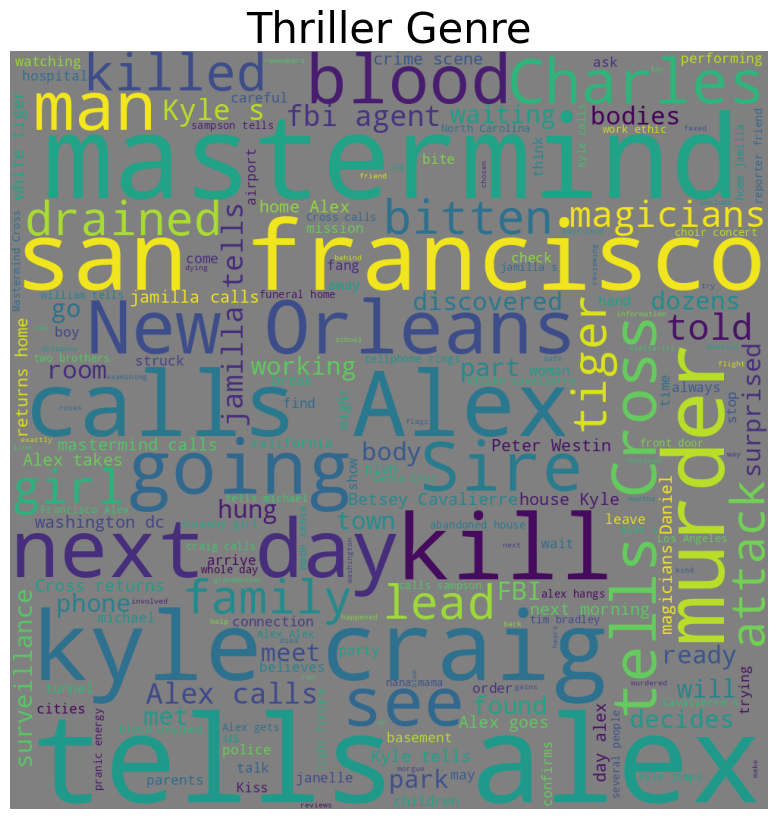

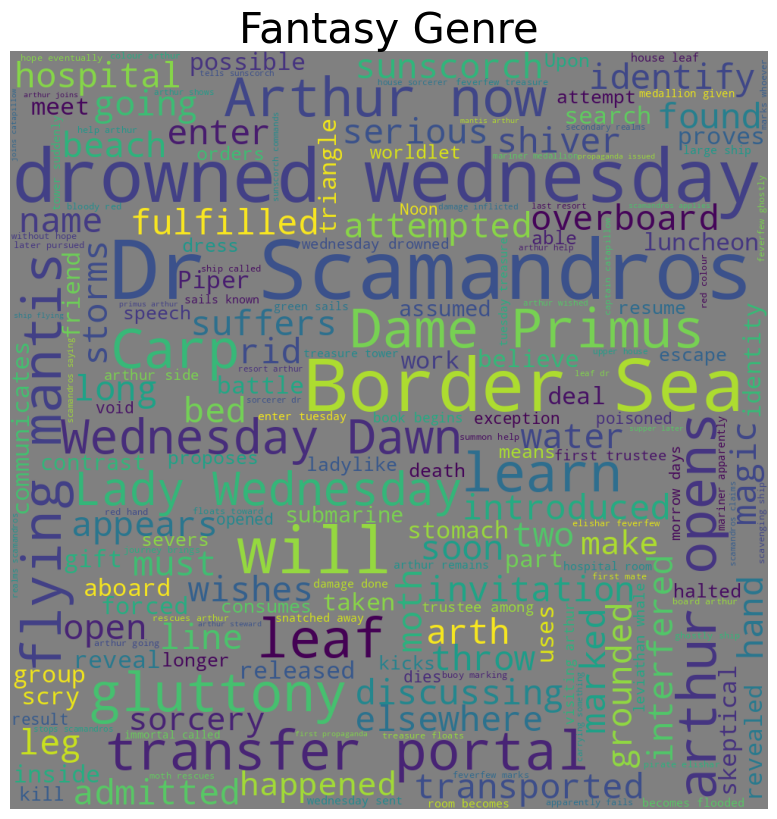

In [16]:
#Plot Hasil WordCloud Fantasy Genre
one = wordcloud_generator(df[df.genre.isin(['thriller']) == True].title_and_summary)
plt.figure(figsize=(8,8), facecolor= None)
plt.title('Thriller Genre', fontsize =30)
plt.imshow(one)
plt.axis('off')
plt.tight_layout(pad =0)
plt.show()

#Plot Hasil WordCloud Fantasy Genre
two = wordcloud_generator(df[df.genre.isin(['fantasy']) == True].title_and_summary)
plt.figure(figsize=(8,8), facecolor= None)
plt.title('Fantasy Genre', fontsize =30)
plt.imshow(two)
plt.axis('off')
plt.tight_layout(pad =0)
plt.show()

# **Proses Preprocessing Dataset**

Menghilangkan tanda baca dan stopword yang tidak diperlukan. Install terlebih dahulu natural language tool kit (nltk) library

In [17]:
!pip install nltk #install library nltk (natural language tool kit)

**Membuat Fungsi Lowercase**

Hal ini bertujuan untuk menyamaratakan seluruh kata menjadi versi lowercasenya

In [18]:
#Fungsi Lowercase

def lowcase(text) :
  text = text.lower()
  return text

In [19]:
#Import library nltk yang telah diinstal
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import numpy as np

#Menghilangkan stopwords dengan fungsi apply
stopWords = set(stopwords.words('english'))
df['filtered_summary']= df['title_and_summary'].apply(lambda x : " ".join([w for w in x.split() if w not in (stopWords)]))

#Menghilangkan tanda baca
tokenizer = nltk.RegexpTokenizer(r"\w+")
df['filtered_summary']= df['filtered_summary'].apply(lambda x : " ".join(tokenizer.tokenize(x)))

#Lowcase all data & Stimming
stemmer= PorterStemmer()
df['filtered_summary']= df['filtered_summary'].apply(lambda x : stemmer.stem(x).lower())


df.head(5) #Mengecek hasil

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,index,title,genre,summary,title_and_summary,total_kata,filtered_summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,Drowned Wednesday Drowned Wednesday is the fir...,805,drowned wednesday drowned wednesday first trus...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...","The Lost Hero As the book opens, Jason awakens...",566,the lost hero as book opens jason awakens scho...
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,The Eyes of the Overworld Cugel is easily pers...,339,the eyes overworld cugel easily persuaded merc...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,Magic's Promise The book opens with Herald-Mag...,778,magic s promise the book opens herald mage van...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,Taran Wanderer Taran and Gurgi have returned t...,1192,taran wanderer taran gurgi returned caer dallb...


Melakukan **one-hot-encoding untuk genre** (karena data merupakan data kategorikal). Dan **drop kolom** yang tidak diperlukan **('index','genre', 'title','summary','total_kata')**

In [20]:
#one-hot-encoding untuk genre
genre = pd.get_dummies(df.genre)

#membuat df baru (hasil gabungan dan drop kolom yang tidak dipakai)
new_df = pd.concat([df, genre], axis=1)
new_df = new_df.drop(columns=['index','genre', 'title','summary', 'title_and_summary','total_kata'])

new_df.head(4)

,filtered_summary,fantasy,thriller
0,drowned wednesday drowned wednesday first trus...,1,0
1,the lost hero as book opens jason awakens scho...,1,0
2,the eyes overworld cugel easily persuaded merc...,1,0
3,magic s promise the book opens herald mage van...,1,0


In [21]:
new_df.info() #mengetahui nama-nama kolom genre

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 4656
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   filtered_summary  1899 non-null   object
 1   fantasy           1899 non-null   uint8 
 2   thriller          1899 non-null   uint8 
dtypes: object(1), uint8(2)
memory usage: 33.4+ KB


**Dataframe perlu di ubah ke array numpy** agar dapat diproses oleh model. Menggunakan **atribut values**

In [22]:
#Jadikan summary dan untuk genre jadikan label
summary = new_df['filtered_summary'].values
genre = (new_df[new_df.columns[1:]].keys())
label = new_df[genre].values

#Cek keluaran
#print(summary)
print(label)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


**Membagi data Train dan Test** dengan rasio 80% data train dan 20% data test (nanti digunakan sebagai validation)

In [23]:
from sklearn.model_selection import train_test_split
summary_train, summary_val, label_train, label_val = train_test_split(summary, label, test_size=0.2)

In [24]:
summary_train.shape, summary_val.shape, label_train.shape, label_val.shape

((1519,), (380,), (1519, 2), (380, 2))

# **Preprocessing Data part 2**

**Melakukan Tokenisasi data yang digunakan** max num_words 100000

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='UNK')
tokenizer.fit_on_texts(summary_train)
#tokenizer.fit_on_texts(summary_val)

train_sequence = tokenizer.texts_to_sequences(summary_train)
val_sequence = tokenizer.texts_to_sequences(summary_val)

padded_train = pad_sequences(train_sequence,padding='post',maxlen=15,truncating='post')
padded_val = pad_sequences(val_sequence,padding='post',maxlen=15,truncating='post')

print(padded_train)
#print(padded_val)

[[ 198    2   95 ...  264 3705    1]
 [ 764   50  692 ...    1  225   14]
 [  64    1    2 ...  721   20  207]
 ...
 [   3 4545  151 ... 2886    3 4545]
 [   3  762    1 ...  141 1273    1]
 [   1    1    3 ...   38  456    1]]


In [26]:
padded_train.shape,padded_val.shape,label_train.shape,label_val.shape

((1519, 15), (380, 15), (1519, 2), (380, 2))

# **Penentuan Model, Optimizer, Loss & Train Model**

Menggunakan **layer Embending dengan dimesi output 128 (input menyesuaikan num_words tokenizer)**. dengan **tambahan layers Dropout** (mencegah overfitting)

In [27]:
import tensorflow as tf

#Membuat Model
model =tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         640000    
                                                                 
 bidirectional (Bidirection  (None, 256)               263168    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                        

**loss** yang digunakan yaitu **categorrical_crossentropy** (data kategorical) dengan **optimizer adam**

In [28]:
model.compile(loss ='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics=['accuracy'])

Menambahkan **callback** (untuk **menghentikan training apabila telah mencapai target akurasi diatas 80%**)

In [29]:
class Callback(tf.keras.callbacks.Callback) :
  def on_epoch_end(self, epoch, logs={}) :
    if(logs.get('accuracy')>0.98 and logs.get('val_accuracy')>0.75) :
      print("Selamat Akurasi diatas 80% Tercapai !!!")
      self.model.stop_training = True
callbacks = Callback()

In [30]:
padded_train.shape,padded_val.shape,label_train.shape,label_val.shape

((1519, 15), (380, 15), (1519, 2), (380, 2))

**Melatih Model**

In [31]:
num_epochs = 100000
history = model.fit(padded_train, label_train, epochs= num_epochs, #batch_size=25,
                    callbacks=[callbacks],validation_data=(padded_val, label_val), verbose=2)

Epoch 1/100000
48/48 - 18s - loss: 0.6922 - accuracy: 0.5332 - val_loss: 0.6914 - val_accuracy: 0.5421 - 18s/epoch - 371ms/step
Epoch 2/100000
48/48 - 6s - loss: 0.6889 - accuracy: 0.5537 - val_loss: 0.6894 - val_accuracy: 0.5395 - 6s/epoch - 126ms/step
Epoch 3/100000
48/48 - 7s - loss: 0.6857 - accuracy: 0.5497 - val_loss: 0.6860 - val_accuracy: 0.5395 - 7s/epoch - 137ms/step
Epoch 4/100000
48/48 - 5s - loss: 0.6735 - accuracy: 0.5688 - val_loss: 0.6730 - val_accuracy: 0.5711 - 5s/epoch - 108ms/step
Epoch 5/100000
48/48 - 5s - loss: 0.6071 - accuracy: 0.7512 - val_loss: 0.5514 - val_accuracy: 0.7763 - 5s/epoch - 103ms/step
Epoch 6/100000
48/48 - 4s - loss: 0.3262 - accuracy: 0.8881 - val_loss: 0.5235 - val_accuracy: 0.7711 - 4s/epoch - 90ms/step
Epoch 7/100000
48/48 - 3s - loss: 0.1502 - accuracy: 0.9473 - val_loss: 0.5390 - val_accuracy: 0.8000 - 3s/epoch - 62ms/step
Epoch 8/100000
48/48 - 3s - loss: 0.0669 - accuracy: 0.9796 - val_loss: 0.6377 - val_accuracy: 0.7789 - 3s/epoch - 59m

**Plot Hasil**

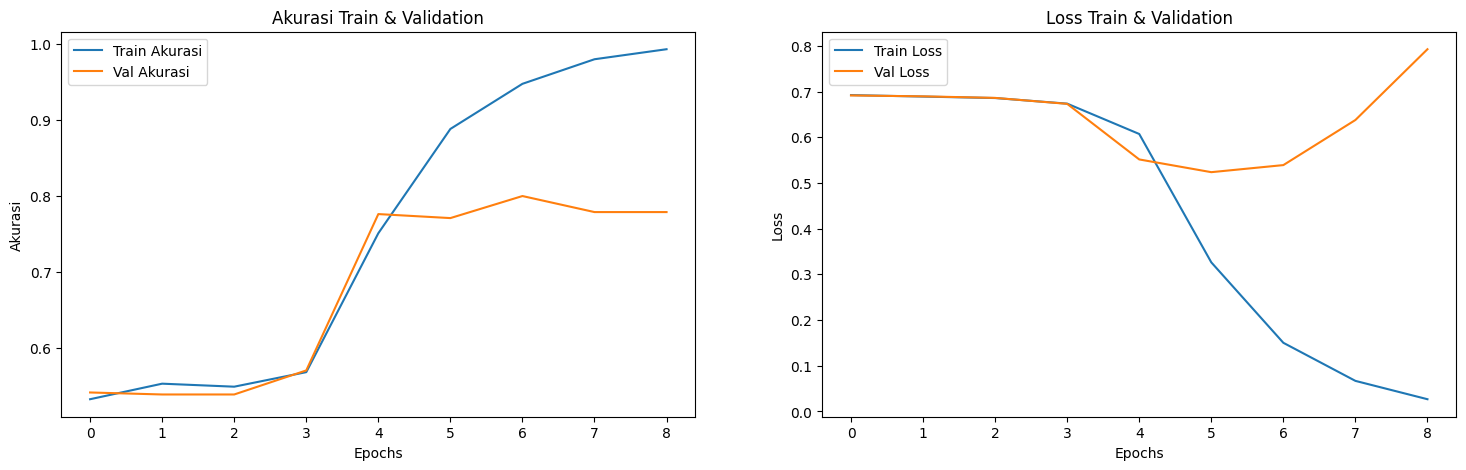

In [32]:
import matplotlib.pyplot as plt

def show_graph(history) :
  fig, ax= plt.subplots(1, 2, figsize=(18,5))
  ax[0].set_title('Akurasi Train & Validation')
  ax[0].plot(history.epoch, history.history['accuracy'], label='Train Akurasi')
  ax[0].plot(history.epoch, history.history['val_accuracy'], label='Val Akurasi')
  ax[0].legend(loc='upper left')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Akurasi')

  ax[1].set_title('Loss Train & Validation')
  ax[1].plot(history.epoch, history.history['loss'], label='Train Loss')
  ax[1].plot(history.epoch, history.history['val_loss'], label='Val Loss')
  ax[1].legend(loc='upper left')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Loss')
  plt.show()

show_graph(history)